# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
%load_ext autoreload
%autoreload 2
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [ ]:
env = UnityEnvironment(file_name='multi/Reacher.app')

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [1]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    import pdb
    pdb.set_trace()
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

NameError: name 'env' is not defined

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import torch
import json
sys.path.append('/home/alishoeb/deep-reinforcement-learning/ddpg-pendulum')

from unityagents import UnityEnvironment
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt

from ddpg_agent import Agent, ReplayBuffer, BUFFER_SIZE, BATCH_SIZE
from model import Actor, Critic
from collections import deque, namedtuple
from IPython.display import display, clear_output


In [2]:
env = UnityEnvironment(file_name='multi/Reacher_Linux/Reacher.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [3]:
TrialParams = namedtuple('TrailParams', ['trial_number', 'fc1_units', 'fc2_units', 'lr_a', 'lr_b', 'use_bn'])

In [4]:
def ddpg(brain_name, tparam, n_episodes=500, max_t=1500, print_every=100):
    # Trial parameters
    trial_number = tparam.trial_number,
    
    # Replay Buffer and agents
    replay_buffer = ReplayBuffer(
        action_size, BUFFER_SIZE, BATCH_SIZE, 52)
    # Agents
    agents = [Agent(
        state_size=state_size, 
        action_size=action_size, 
        memory=replay_buffer, 
        fc1_units=tparam.fc1_units,
        fc2_units=tparam.fc2_units,
        lr_a= tparam.lr_a,
        lr_c= tparam.lr_b,
        use_bn = False,
        random_seed=np.random.randint(0, 100)) for i in range(20)]
    
    # Collective Score
    scores_deque = deque(maxlen=print_every)
    scores = []
    
    # Indiviaul Agent Scores
    agent_scores = {}
    for idx, agent in enumerate(agents):
        agent_scores[idx] = {}
        agent_scores[idx]['params'] = '%d_%d_%f_%f_%d_%d' % (
            agent.fc1_units, agent.fc2_units, agent.lr_a, agent.lr_c, agent.random_seed, agent.use_bn)
        agent_scores[idx]['episode_score'] = 0.
        agent_scores[idx]['scores'] = deque(maxlen=print_every)
        agent_scores[idx]['all_scores'] = []
    
    # Loop over episodes
    for i_episode in range(1, n_episodes+1):
        
        # Reset Agents and environment
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        for idx, agent in enumerate(agents):
            agent.reset()
            agent_scores[idx]['episode_score'] = 0.

        for t in range(max_t):
            
            actions = np.stack([agent.act(states[idx]) for idx, agent in enumerate(agents)], 0)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            for idx, agent in enumerate(agents):
                agent.step(states[idx], actions[idx], rewards[idx], next_states[idx], dones[idx], t)
            states = next_states
            
            for idx, reward in enumerate(rewards):
                agent_scores[idx]['episode_score'] += reward
            
            if np.any(dones):
                break 
                
        clear_output(wait=True)

        # Record each agent's final score in previous episode
        mean_scores = []
        for idx, _ in enumerate(agents):
            agent_scores[idx]['scores'].append(agent_scores[idx]['episode_score'])
            agent_scores[idx]['all_scores'].append(agent_scores[idx]['episode_score'])
            mean_scores.append(np.mean(agent_scores[idx]['scores']))

        # Agents with scores more than 3 points away from best agent will
        # have their parameters replaced by those of the best agent.
        best_agent = np.argmax(mean_scores)
        for idx, _ in enumerate(agents):
            if idx != best_agent:
                if mean_scores[idx] <= mean_scores[best_agent] - 3:
                    display('Copying Agent {} to Agent {}'.format(best_agent, idx))
                    agents[idx].soft_update(agents[best_agent].actor_local, agents[idx].actor_local, 1.0)
                    agents[idx].soft_update(agents[best_agent].actor_target, agents[idx].actor_target, 1.0)
                    agents[idx].soft_update(agents[best_agent].critic_local, agents[idx].critic_local, 1.0)
                    agents[idx].soft_update(agents[best_agent].critic_target, agents[idx].critic_target, 1.0)                

        # Update collective score
        score = np.mean([agent_scores[idx]['episode_score'] for idx, _ in enumerate(agents)])
        scores_deque.append(score)
        scores.append(score)
        
        display('Trial {} | Episode {} | Average Score: {:.2f}'.format(
            trial_number, i_episode, np.mean(scores_deque)))
        
        for idx, agent in enumerate(agents):
            display('Agent {} | param {} | Score: {}'.format(
                idx, agent_scores[idx]['params'], np.mean(agent_scores[idx]['scores'])))
            torch.save(agent.actor_local.state_dict(), 'agent_%d_checkpoint_actor.pth' % idx)
            torch.save(agent.critic_local.state_dict(), 'agent_%d_checkpoint_critic.pth' % idx)
        
        if i_episode % print_every == 0:
            display('Trail {} | Episode {} | Average Score: {:.2f}'.format(
                trial_number, i_episode, np.mean(scores_deque)))
        
        if np.mean(scores_deque) >= 30.0:
            print('Environment Solved with score of {} after {} episodes'.format(
                np.mean(scores_deque), i_episode))
            break
            
    return scores, agent_scores

In [ ]:
tparam = TrialParams(trial_number=0, fc1_units=64, fc2_units=128, lr_a=2.6e-3, lr_b=1.9e-4, use_bn=True)
trial_scores, agent_scores = ddpg(brain_name, tparam)

'Trial (0,) | Episode 1 | Average Score: 0.31'

'Agent 0 | param 64_128_0.002600_0.000190_58_0 | Score: 0.0'

'Agent 1 | param 64_128_0.002600_0.000190_25_0 | Score: 0.0'

'Agent 2 | param 64_128_0.002600_0.000190_3_0 | Score: 0.0'

'Agent 3 | param 64_128_0.002600_0.000190_14_0 | Score: 0.0'

'Agent 4 | param 64_128_0.002600_0.000190_87_0 | Score: 0.47999998927116394'

'Agent 5 | param 64_128_0.002600_0.000190_71_0 | Score: 0.1699999962002039'

'Agent 6 | param 64_128_0.002600_0.000190_1_0 | Score: 0.0'

'Agent 7 | param 64_128_0.002600_0.000190_89_0 | Score: 0.8899999801069498'

'Agent 8 | param 64_128_0.002600_0.000190_6_0 | Score: 0.9699999783188105'

'Agent 9 | param 64_128_0.002600_0.000190_16_0 | Score: 0.1099999975413084'

'Agent 10 | param 64_128_0.002600_0.000190_16_0 | Score: 0.7999999821186066'

'Agent 11 | param 64_128_0.002600_0.000190_30_0 | Score: 0.7999999821186066'

'Agent 12 | param 64_128_0.002600_0.000190_90_0 | Score: 0.0'

'Agent 13 | param 64_128_0.002600_0.000190_4_0 | Score: 0.0'

'Agent 14 | param 64_128_0.002600_0.000190_49_0 | Score: 0.2299999948590994'

'Agent 15 | param 64_128_0.002600_0.000190_66_0 | Score: 0.0'

'Agent 16 | param 64_128_0.002600_0.000190_18_0 | Score: 0.0'

'Agent 17 | param 64_128_0.002600_0.000190_22_0 | Score: 1.269999971613288'

'Agent 18 | param 64_128_0.002600_0.000190_15_0 | Score: 0.3899999912828207'

'Agent 19 | param 64_128_0.002600_0.000190_78_0 | Score: 0.11999999731779099'

In [6]:
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb
import json
for idx in range(len(agent_scores)):
    agent_scores[idx]['scores'] = list(agent_scores[idx]['scores'])
json.dump(agent_scores, open('64_128_lr_2p6e-3_1p9e-4_param_exchange.json', 'w'))

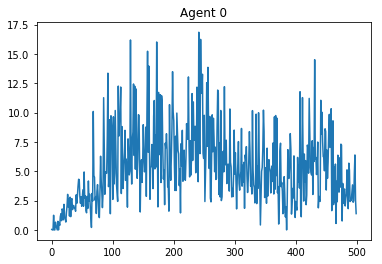

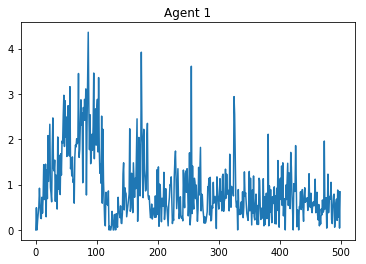

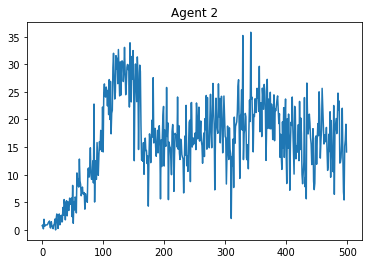

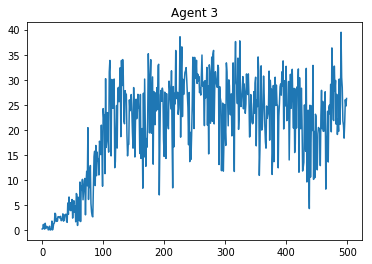

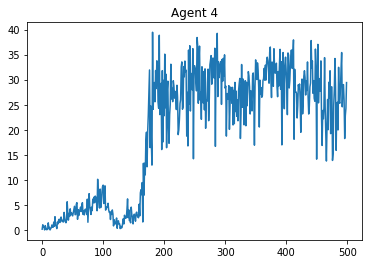

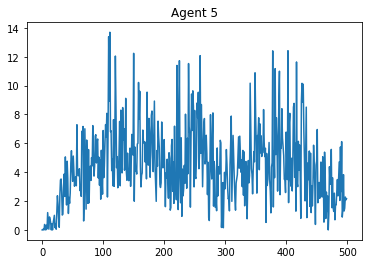

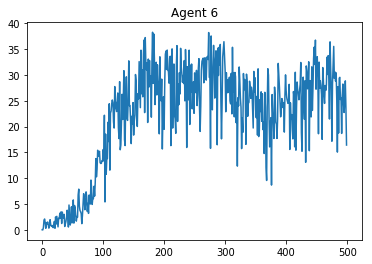

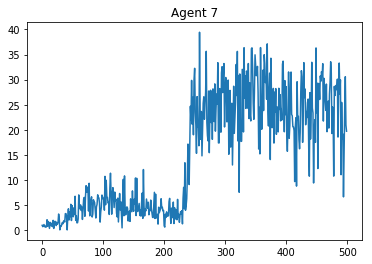

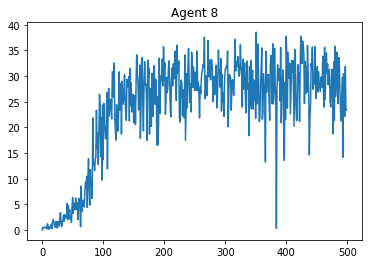

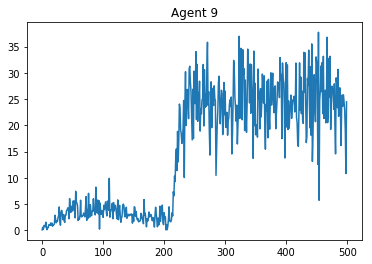

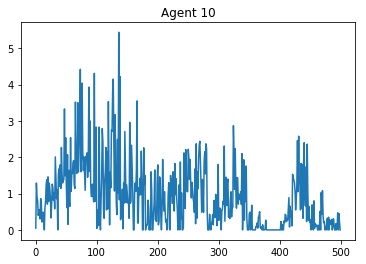

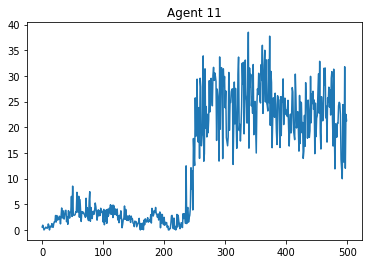

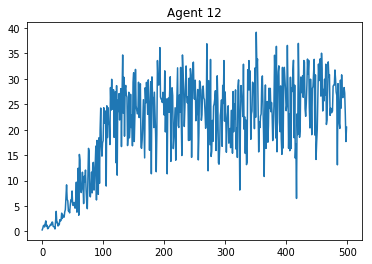

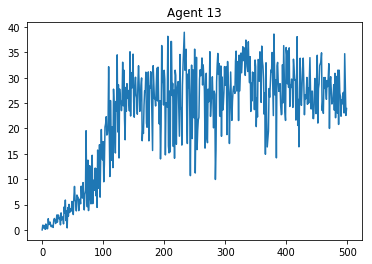

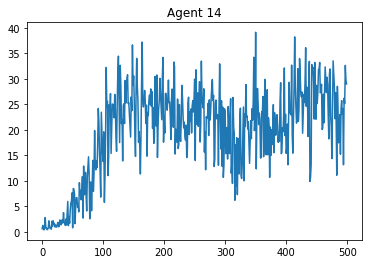

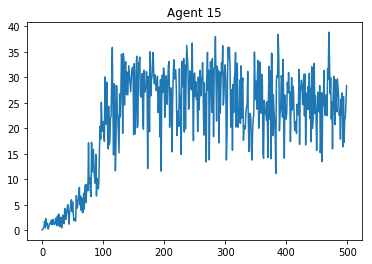

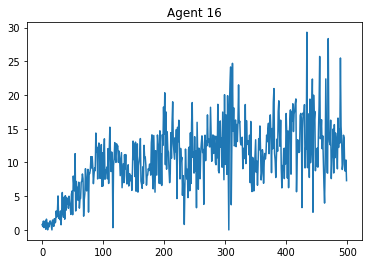

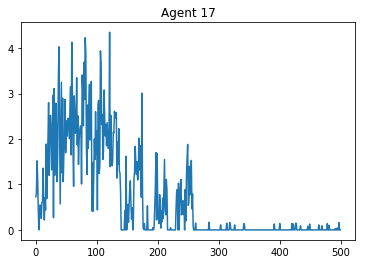

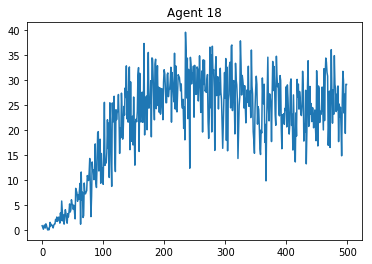

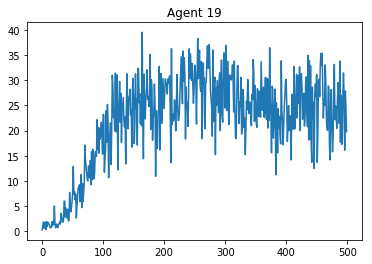

In [9]:
for i in range(20):
    plt.figure()
    plt.plot(agent_scores[i]['all_scores'])
    plt.title('Agent {}'.format(i))

In [2]:
agent_scores = json.load(open('64_128_results.json', 'r'))

In [5]:
agent_scores[0]

KeyError: 0

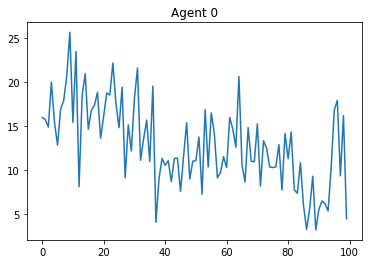

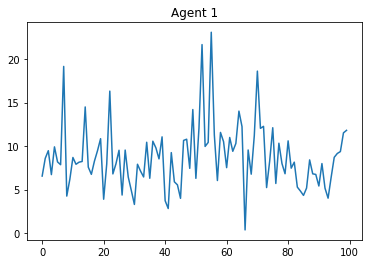

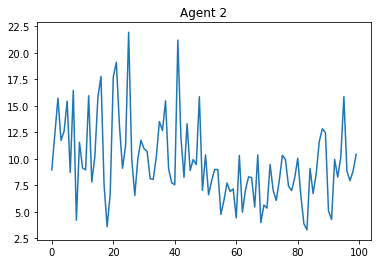

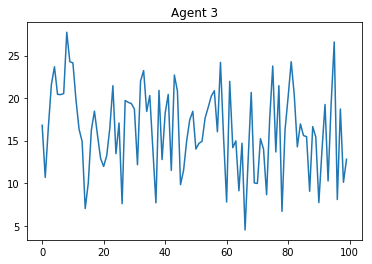

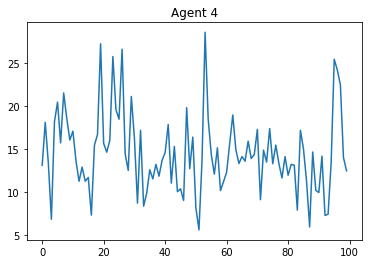

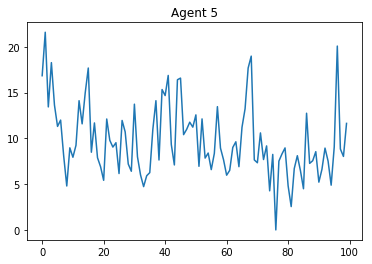

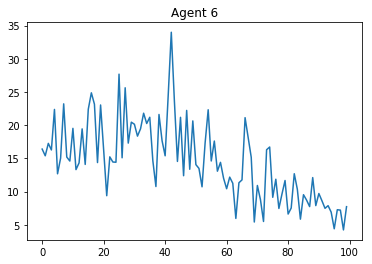

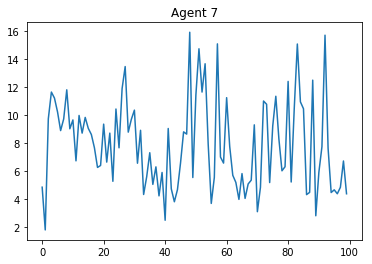

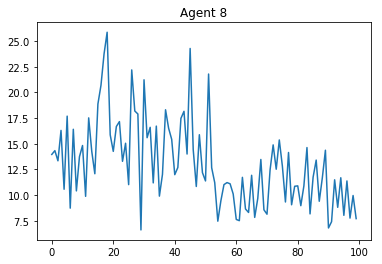

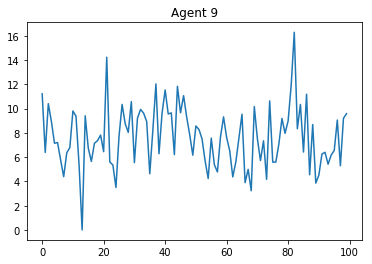

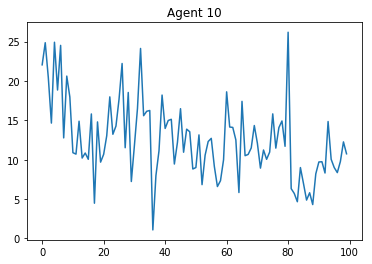

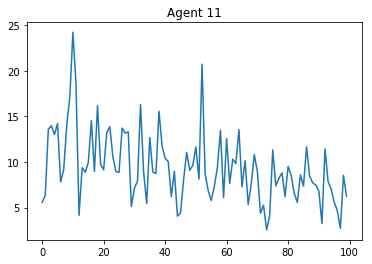

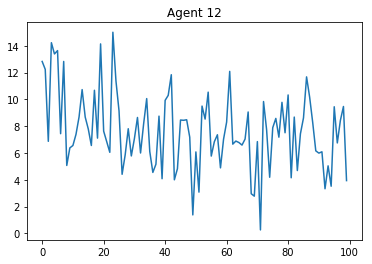

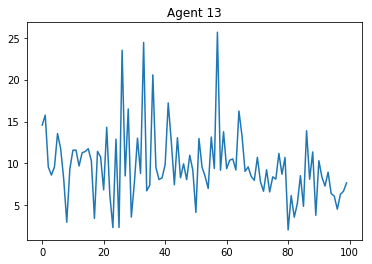

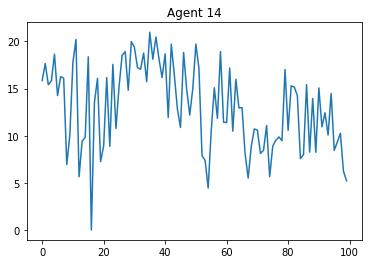

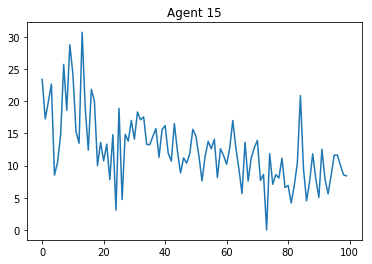

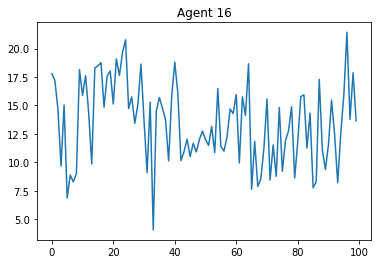

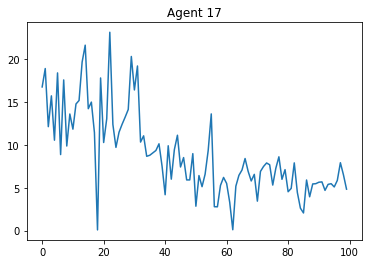

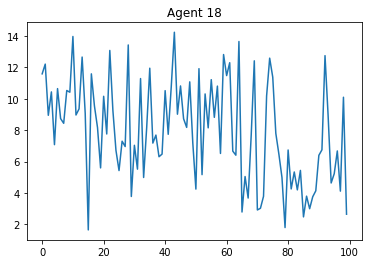

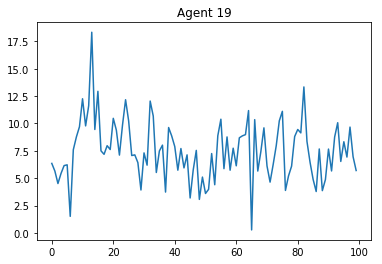

In [9]:
for i in range(20):
    plt.figure()
    plt.plot(agent_scores['{}'.format(i)]['scores'])
    plt.title('Agent {}'.format(i))

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

When finished, you can close the environment.

In [ ]:
torch.__version__

In [9]:
a = [32,64,128,1024]
np.random.choice(a,1)

array([32])